<a href="https://colab.research.google.com/github/ziraax/StockPricePredictionRNN-LSTM/blob/main/StockPricePredLSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction du prix d'une action avec les modeles LSTM et RNN**

## **Project Overview**

La prédiction des prix des actions joue un rôle crucial dans les marchés financiers, et des prévisions précises peuvent avoir des implications significatives pour les entreprises, les investisseurs et les institutions financières.

La prédiction des prix des actions aide les investisseurs et les gestionnaires de fonds à prendre des décisions d'investissement éclairées. En prévoyant avec précision les prix futurs des actions, les investisseurs peuvent identifier des opportunités potentielles pour maximiser les profits ou minimiser les pertes. Cela leur permet de répartir judicieusement leur capital et d'ajuster leurs portefeuilles d'investissement en fonction des mouvements de prix prévus.

Les techniques d'apprentissage automatique (Machine Learning) et d'apprentissage profond (Deep Learning) ont démontré leur potentiel pour améliorer la précision des prédictions des prix des actions et aider les investisseurs, les traders et les analystes financiers à prendre des décisions éclairées. En utilisant les techniques de ML, les entreprises peuvent obtenir des informations précieuses, optimiser leurs stratégies d'investissement et améliorer la gestion des risques dans le domaine complexe et dynamique du marché boursier.

La prédiction des prix des actions est une tâche difficile en raison de la complexité inhérente et de la volatilité des marchés financiers. Les méthodes traditionnelles échouent souvent à capturer les motifs complexes et les dépendances présents dans les données des prix des actions. Cependant, les modèles RNN et LSTM ont montré un grand potentiel pour capturer les dépendances temporelles et faire des prédictions précises dans diverses tâches de prévision de séries chronologiques.


Tout au long de ce projet, nous examinerons les fondamentaux des RNN et des LSTM et explorerons leur adéquation pour capturer les dépendances temporelles dans les données de prix des actions. Nous apprendrons comment prétraiter et préparer le jeu de données historiques des prix des actions pour l'entraînement et le test de nos modèles.

## **Objectifs d'apprentissage**

* Revoir les bases des réseaux neuronaux pour comprendre leur structure et leur fonctionnalité.

* Apprendre à charger et prétraiter les données de séries temporelles pour les prix des actions, en assurant la qualité et la cohérence des données.

* Formuler la prédiction des prix des actions comme un problème de prévision de séries temporelles, en considérant l'ordre temporel des données et en les divisant en ensembles d'entraînement et de test.

* Apprendre les principes et l'architecture des réseaux neuronaux récurrents (RNN).

* Comprendre comment les RNN traitent les données séquentielles et capturent les dépendances temporelles.

* Évaluer les métriques de performance des modèles.

* Explorer les réseaux de mémoire à long court terme (LSTM), un type spécialisé de RNN. Comprendre les avantages des LSTM pour capturer les dépendances à long terme et atténuer le problème du gradient qui disparaît.

* Apprendre à intégrer des caractéristiques ou des facteurs supplémentaires pouvant influencer les prix des actions, tels que l'indice de force relative (RSI) et la moyenne mobile exponentielle (EMA), et formuler un problème d'entrée multivariée pour améliorer la précision des prévisions.

* Comprendre les défis et les limites inhérents à la prédiction des prix des actions, y compris la volatilité du marché, les événements imprévus et la présence de bruit dans les marchés financiers.

## **Approche**

* Bases des réseaux neuronaux :
    * Revoir les bases des réseaux neuronaux pour comprendre leur structure et leur fonctionnalité.
    * Construire et entraîner des réseaux neuronaux avec Keras sur un jeu de données d'exemple.

* Chargement des données de séries temporelles :
    * Obtenir les données de séries temporelles pour les prix des actions à partir de Yahoo Finance.

* Transformations des données :
    * Effectuer une mise à l'échelle des caractéristiques ou une normalisation pour amener les données dans une plage cohérente.
    * Créer des fenêtres chevauchantes pour l'entraînement.

* Réseaux neuronaux récurrents (RNN) :
    * Construction et entraînement du modèle.
    * Génération de séquences et évaluation.

* LSTM :
    * Construction et entraînement du modèle.
    * Génération de séquences et évaluation.

* Entrée multivariée et LSTM :
    * Création d'indicateurs techniques.
    * Création d'étiquettes.
    * Effectuer une mise à l'échelle des caractéristiques ou une normalisation pour amener les données dans une plage cohérente.
    * Construction et entraînement du modèle.
    * Évaluation.

## **Installation des librairies**

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install tensorflow
!pip install statsmodels
!pip install numpy
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install yfinance
!pip install pandas_datareader
!pip install pandas_ta
!pip install Keras

In [4]:
from datetime import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import yfinance as yf
from sklearn.metrics import *
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import pandas_ta as ta
from keras.layers import LSTM, SimpleRNN
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
keras.backend.set_image_data_format("channels_last")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
yf.pdr_override()
%matplotlib inline

## **Refresher: Neural Networks**

### **Neural Network Architecture**

Les réseaux neuronaux, également connus sous le nom de réseaux de neurones artificiels ou simplement neural nets, sont des modèles computationnels inspirés par la structure et la fonctionnalité du cerveau humain. Ils sont largement utilisés en machine learning et deep learning pour résoudre des problèmes complexes dans divers domaines.

#### **Basic Structure**

Un réseau neuronal se compose de couches interconnectées de neurones artificiels, également appelés nœuds ou unités. Les couches sont organisées en une couche d'entrée, une ou plusieurs couches cachées et une couche de sortie. La couche d'entrée reçoit les données d'entrée, les couches cachées traitent l'information, et la couche de sortie produit les prédictions ou sorties finales.

#### **Neurons and Connections**

Chaque neurone dans un réseau neuronal effectue un calcul sur ses entrées et produit une sortie. Les neurones d'une couche sont connectés aux neurones de la couche suivante par des connexions pondérées. Ces poids déterminent la force des connexions et sont ajustés pendant le processus d'entraînement pour optimiser les performances du réseau.

#### **Mathematics of a Basic Neural Network**

Un réseau neuronal de base se compose de plusieurs couches de neurones connectées par des connexions pondérées. Considérons un réseau neuronal avec une couche d'entrée, une couche cachée et une couche de sortie.

#### **Notation**:

- Couche d'entrée : $X = [x_1, x_2, ..., x_n]$, où $x_i$ représente la $i$-ème caractéristique d'entrée.
- Couche cachée : $H = [h_1, h_2, ..., h_m]$, où $h_i$ représente le $i$-ème neurone de la couche cachée.
- Couche de sortie : $Y = [y_1, y_2, ..., y_k]$, où $y_i$ représente le $i$-ème neurone de sortie.

#### **Forward Propagation**:

La somme pondérée des entrées pour un neurone dans la couche cachée est calculée comme suit :

$$z_j = \sum_{i=1}^{n} w_{ji}^{(1)} x_i + b_j^{(1)}$$

où $w_{ji}^{(1)}$ représente le poids reliant la $i$-ème entrée au $j$-ème neurone de la couche cachée, et $b_j^{(1)}$ est le terme de biais pour le $j$-ème neurone.

La sortie de chaque neurone dans la couche cachée est obtenue en appliquant une fonction d'activation $\sigma$ :

$$h_j = \sigma(z_j)$$

De même, la somme pondérée des entrées pour un neurone dans la couche de sortie est calculée comme suit :

$$z_k = \sum_{j=1}^{m} w_{kj}^{(2)} h_j + b_k^{(2)}$$

où $w_{kj}^{(2)}$ représente le poids reliant le $j$-ème neurone de la couche cachée au $k$-ème neurone de la couche de sortie, et $b_k^{(2)}$ est le terme de biais pour le $k$-ème neurone.

La sortie de chaque neurone dans la couche de sortie est obtenue en appliquant une fonction d'activation $\sigma$ :

$$y_k = \sigma(z_k)$$

#### **Activation Functions**

Les fonctions d'activation sont un composant vital des réseaux neuronaux. Elles introduisent de la non-linéarité et permettent au réseau neuronal d'apprendre des relations complexes dans les données. Voici quelques raisons pour lesquelles les fonctions d'activation sont nécessaires :

1. **Non-Linéarité** : Sans fonctions d'activation, le réseau neuronal ne pourrait approximativement que des fonctions linéaires, limitant sa capacité d'apprentissage. Les fonctions d'activation permettent au réseau de modéliser des relations non linéaires entre les entrées et les sorties.

2. **Normalization** : Les fonctions d'activation peuvent normaliser la sortie d'un neurone, garantissant que les valeurs se situent dans une plage désirée. Cela peut aider à stabiliser le processus d'apprentissage et à améliorer la convergence du réseau.

3. **Differentiability** : Les fonctions d'activation sont différentiables, ce qui est essentiel pour l'entraînement des réseaux neuronaux utilisant des algorithmes d'optimisation basés sur le gradient comme la rétropropagation. Les gradients des fonctions d'activation aident à mettre à jour les poids et les biais pendant le processus d'entraînement.

Les fonctions d'activation courantes utilisées dans les réseaux neuronaux incluent la fonction sigmoïde, la fonction tanh (tangente hyperbolique) et la fonction ReLU (Rectified Linear Unit).

En appliquant des fonctions d'activation après la somme pondérée des entrées, les réseaux neuronaux peuvent modéliser des relations complexes et faire des prédictions non linéaires, leur permettant ainsi de résoudre une large gamme de problèmes.

#### **Feedforward Propagation**

Dans la propagation avant, l'information circule à travers le réseau dans la direction avant, en commençant par la couche d'entrée et en passant par les couches cachées jusqu'à atteindre la couche de sortie. Chaque neurone reçoit des entrées de la couche précédente, calcule sa somme pondérée, applique la fonction d'activation et transmet la sortie à la couche suivante.

#### **Backpropagation**

La rétropropagation est un algorithme utilisé pour entraîner les réseaux neuronaux en ajustant les poids en fonction des gradients calculés de la fonction de perte par rapport aux poids. Elle implique de calculer l'erreur entre les sorties prédites et les cibles réelles et de propager cette erreur en arrière à travers le réseau pour mettre à jour les poids.

#### **Loss Functions**

Les fonctions de perte quantifient la différence entre les sorties prédites du réseau neuronal et les cibles réelles. Les fonctions de perte courantes incluent l'erreur quadratique moyenne (MSE) pour les tâches de régression et l'entropie croisée pour les tâches de classification. Le choix de la fonction de perte dépend de la nature du problème à résoudre.

#### **Optimization Algorithms**

Les algorithmes d'optimisation, tels que le stochastic gradient descent (SGD) et ses variantes (par exemple, Adam, RMSprop), sont utilisés pour minimiser la fonction de perte et mettre à jour les poids du réseau neuronal pendant l'entraînement. Ces algorithmes ajustent les poids de manière itérative en fonction des gradients calculés via la rétropropagation.

#### **Hidden Layers and Network Depth**

Les couches cachées dans un réseau neuronal effectuent les calculs nécessaires à l'extraction de caractéristiques et à l'apprentissage de représentations. Le nombre de couches cachées et le nombre de neurones dans chaque couche, appelés profondeur du réseau, sont des hyperparamètres qui peuvent être ajustés en fonction de la complexité du problème et des ressources computationnelles disponibles.

#### **Deep Neural Networks**

Les réseaux neuronaux profonds se réfèrent aux réseaux neuronaux avec plusieurs couches cachées. Le deep learning a gagné une attention significative en raison de la capacité des réseaux neuronaux profonds à apprendre des représentations hiérarchiques et à résoudre des problèmes complexes dans des domaines tels que la vision par ordinateur, le traitement du langage naturel et la reconnaissance vocale.

L'architecture des réseaux neuronaux joue un rôle crucial dans les performances et les capacités du modèle. Choisir la bonne architecture, y compris le nombre de couches, le nombre de neurones et les fonctions d'activation, est essentiel pour obtenir des résultats optimaux dans diverses tâches de machine learning et de deep learning.


### **Neural Network Prediction for Regression and Classification**

Les réseaux neuronaux sont des modèles polyvalents qui peuvent être utilisés pour des tâches de régression et de classification. Le processus de prédiction diffère légèrement en fonction du type de problème à traiter.

#### **Regression Prediction**

Dans les tâches de régression, l'objectif est de prédire une valeur numérique continue en sortie. Voici comment les réseaux neuronaux font des prédictions pour la régression :

1. **Feedforward Propagation** : Les données d'entrée sont passées à travers le réseau neuronal dans la direction avant. Chaque neurone du réseau reçoit des entrées de la couche précédente, calcule la somme pondérée des entrées, applique une fonction d'activation et transmet la sortie à la couche suivante. Ce processus continue jusqu'à atteindre la couche de sortie.

2. **Output Layer** : En régression, la couche de sortie consiste généralement en un seul neurone qui produit une valeur numérique continue. La fonction d'activation utilisée dans la couche de sortie dépend des exigences spécifiques du problème. Par exemple, une fonction ReLU est couramment utilisée pour les tâches de régression.

3. **Final Prediction** : La valeur de sortie du neurone de la couche de sortie du réseau neuronal représente la valeur prédite pour la tâche de régression. Elle peut être interprétée comme l'estimation ou l'approximation du modèle de la valeur cible basée sur l'entrée donnée.

#### **Classification Prediction**

Dans les tâches de classification, l'objectif est d'assigner les données d'entrée à des catégories ou classes spécifiques. Les réseaux neuronaux peuvent effectuer des classifications multi-classes ou binaires. Voici comment les réseaux neuronaux font des prédictions pour la classification :

1. **Feedforward Propagation** : Similaire à la régression, les données d'entrée sont propagées à travers le réseau dans la direction avant. Chaque neurone calcule la somme pondérée des entrées, applique une fonction d'activation et transmet la sortie à la couche suivante.

2. **Output Layer** : En classification, la couche de sortie dépend du nombre de classes dans le problème. Pour la classification binaire, la couche de sortie consiste généralement en un seul neurone utilisant une fonction d'activation sigmoïde, qui produit une valeur entre 0 et 1 représentant la probabilité d'appartenir à la classe positive. Pour la classification multi-classes, la couche de sortie peut se composer de plusieurs neurones utilisant une activation softmax, où chaque neurone représente la probabilité d'appartenir à une classe spécifique.

3. **Final Prediction** : En classification binaire, la classe prédite peut être déterminée en fonction d'une valeur seuil (par exemple, 0,5). Si la probabilité de sortie est au-dessus du seuil, l'échantillon est classé dans la classe positive ; sinon, il est classé dans la classe négative. En classification multi-classes, la classe avec la probabilité prédite la plus élevée est assignée comme classe prédite.

Les réseaux neuronaux apprennent la correspondance entre les données d'entrée et la sortie désirée à travers le processus d'entraînement, où les poids et biais sont ajustés pour minimiser l'erreur entre la sortie prédite et les valeurs cibles réelles. Une fois entraîné, le réseau neuronal peut être utilisé pour faire des prédictions sur de nouvelles données non vues.

Comprendre comment les réseaux neuronaux font des prédictions dans les tâches de régression et de classification est crucial pour interpréter les sorties du modèle et évaluer ses performances.


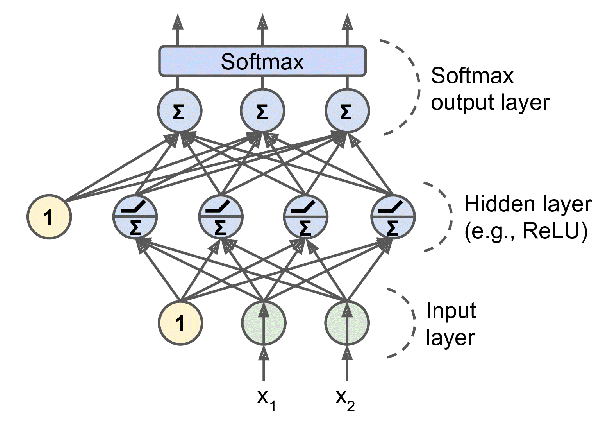

## **Time Series Data**

In [15]:
dataset = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())

[*********************100%%**********************]  1 of 1 completed


In [16]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.200518,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.699442,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.921188,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.261724,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,21.968702,59706800


In [17]:
# Start and end of training dataset
tstart = 2016
tend = 2020

In [18]:
def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(24, 8), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("Microsoft stock price")
    plt.show()

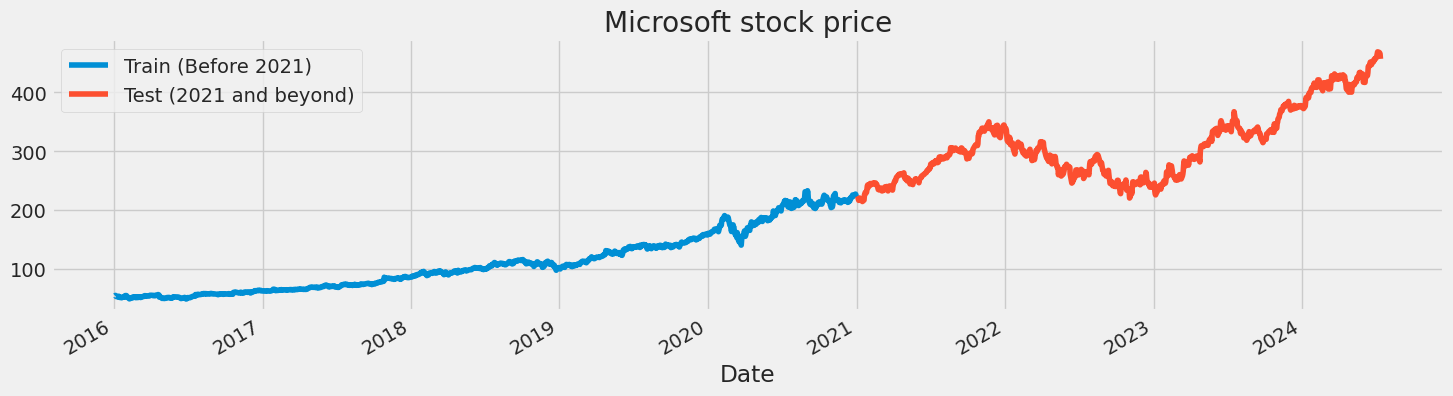

In [19]:
train_test_plot(dataset, tstart, tend)

### Creation des datasets train et test ###

In [20]:
def train_test_split(dataset, tstart, tend, columns = ['High']):
    train = dataset.loc[f"{tstart}":f"{tend}", columns].values
    test = dataset.loc[f"{tend+1}":, columns].values
    return train, test

In [21]:
training_set, test_set = train_test_split(dataset, tstart, tend)

### Scaling des valeurs avec MinMaxScaler

### **Importance of Normalization in Neural Network Layers**

La normalisation est une étape cruciale dans le processus d'entraînement et d'optimisation des réseaux neuronaux. Elle consiste à mettre à l'échelle et à transformer les données d'entrée ou les activations intermédiaires pour qu'elles atteignent une plage ou une distribution spécifique. La normalisation est généralement appliquée aux caractéristiques individuelles ou à des couches entières du réseau neuronal. Voici pourquoi la normalisation est importante :

#### **1. Mitigates the Impact of Different Scales:**

Dans les ensembles de données réels, les caractéristiques ont souvent des échelles différentes. Par exemple, une caractéristique peut varier de 0 à 1, tandis qu'une autre peut varier de 0 à 1000. Si ces caractéristiques ne sont pas normalisées, les différences d'échelle peuvent avoir un impact significatif sur le processus d'apprentissage. La normalisation permet de mettre toutes les caractéristiques sur une échelle similaire, empêchant le réseau d'être dominé par les caractéristiques ayant des valeurs plus grandes et améliorant la convergence de l'algorithme d'optimisation.

#### **2. Accelerates Convergence:**

La normalisation aide à accélérer la convergence de l'entraînement du réseau neuronal. Lorsque les caractéristiques ont des échelles différentes, l'algorithme d'optimisation peut prendre plus de temps pour trouver la solution optimale. Normaliser les données d'entrée ou les activations intermédiaires permet aux gradients de se propager plus efficacement à travers le réseau, permettant une convergence plus rapide. Cela peut aider à réduire le nombre d'itérations d'entraînement nécessaires pour atteindre un niveau de performance satisfaisant.

#### **3. Improves Numerical Stability:**

Dans les réseaux neuronaux profonds, à mesure que les signaux passent à travers plusieurs couches, ils peuvent être soumis à de grandes valeurs ou à des variations extrêmes. Cela peut entraîner des problèmes de stabilité numérique, tels que le problème de gradient qui disparaît ou le problème de gradient explosif. Les techniques de normalisation, telles que la normalisation par lot (batch normalization) ou la normalisation par couche (layer normalization), aident à atténuer ces problèmes en maintenant les activations dans une plage appropriée. En veillant à ce que les entrées des couches suivantes soient bien comportées, la normalisation améliore la stabilité du processus d'apprentissage.

#### **4. Facilitates Generalization:**

La normalisation peut améliorer la capacité de généralisation des réseaux neuronaux. En contraignant la plage des valeurs, la normalisation empêche le surapprentissage (overfitting), où le réseau devient trop spécialisé dans les données d'entraînement et ne parvient pas à bien généraliser aux données non vues. La normalisation aide à régulariser le réseau et à réduire la sensibilité aux fluctuations mineures des données d'entrée. Elle permet au réseau de se concentrer sur l'apprentissage des modèles et des relations sous-jacents dans les données, conduisant à une meilleure performance de généralisation.


In [22]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

### Creation des "overlapping window batches"

In [23]:
n_steps = 1
features = 1

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [24]:
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [25]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

### Evaluation

### **Errors in Regression**

La ligne de régression tend vers la moyenne pour créer le meilleur ajustement, ce qui signifie essentiellement que les erreurs sont minimales. Dans le graphique ci-dessus, il est visible que la ligne de régression n'est pas capable de prédire exactement les valeurs réelles. Il y aura toujours un espace pour des erreurs.

Comprenons les différentes erreurs en régression :

* **Mean Absolute Error (MAE)** : L'erreur absolue moyenne (MAE) est la statistique d'erreur de régression la plus basique à comprendre. Nous calculons le résidu pour chaque point de données individuellement, en utilisant uniquement la valeur absolue de chacun pour que les résidus négatifs et positifs ne s'annulent pas. Ensuite, nous calculons la moyenne de tous ces résidus. Le MAE décrit essentiellement la magnitude typique des résidus. <br>
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y-\hat y|$$

* **Mean Square Error (MSE)** : L'erreur quadratique moyenne (MSE) est identique à l'erreur absolue moyenne (MAE) mais élève au carré la différence avant de les agréger. Le MSE sera presque toujours supérieur au MAE parce que nous élevons au carré la différence. En raison de cela, nous ne pouvons pas comparer directement le MAE et le MSE. Nous nous limitons à comparer les métriques d'erreur de notre modèle avec celles d'un modèle concurrent. La présence de valeurs aberrantes dans nos données rend l'impact du terme au carré très clair dans l'équation du MSE. Dans le MAE, chaque résidu ajoute proportionnellement à l'erreur totale, tandis que dans le MSE, l'erreur augmente de manière quadratique. Par conséquent, nos valeurs aberrantes entraîneront finalement une erreur totale beaucoup plus grande dans le MSE que dans le MAE. De même, notre modèle souffrira davantage s'il prédit des valeurs très différentes de la valeur réelle correspondante.
Cela signifie que dans le MSE par rapport au MAE, les écarts importants entre les valeurs réelles et les valeurs prédites sont plus sévèrement punis. <br>Si nous souhaitons limiter l'importance des valeurs aberrantes, nous devrions utiliser le MAE car les résidus aberrants ne contribuent pas autant à l'erreur totale que dans le MSE. Enfin, le choix entre le MSE et le MAE est spécifique à l'application et dépend de la manière dont les grandes erreurs doivent être traitées.

$$MSE= \frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$

* **Root Mean Squared Error (RMSE)** : L'erreur quadratique moyenne (RMSE) est une autre statistique d'erreur que vous pouvez rencontrer. C'est la racine carrée du MSE, comme son nom l'indique. Comme le MSE est au carré, ses unités diffèrent de la sortie originale. Le RMSE est souvent utilisé pour ramener la métrique d'erreur dans des unités comparables, facilitant ainsi l'interprétation. Les valeurs aberrantes ont un effet comparable sur le MSE et le RMSE car ils élèvent tous deux au carré le résidu.

$$RMSE= \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2}$$

* **Mean Absolute Percentage Error (MAPE)** : L'erreur absolue moyenne en pourcentage (MAPE) est la contrepartie en pourcentage du MAE. Tout comme le MAE est la quantité moyenne d'erreur générée par votre modèle, le MAPE est la distance moyenne entre les prédictions du modèle et leurs sorties associées. Le MAPE, comme le MAE, a une signification claire car les pourcentages sont plus faciles à comprendre pour les gens. En raison de l'utilisation de la valeur absolue, le MAPE et le MAE sont tous deux résistants aux effets des valeurs aberrantes.

$$MAPE= \frac{100\%}{n}\ \sum_{i=1}^{n}\left| \frac{y-\hat y}{y} \right|$$


In [26]:
def plot_predictions(test, predicted, title):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title(f'{title}')
    plt.xlabel("Time")
    plt.ylabel(f'{title}')
    plt.legend()
    plt.show()

In [27]:
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

## **Recurrent Neural Networks**

Les RNN ont été créés parce qu'il y avait quelques problèmes dans les réseaux neuronaux à propagation avant (feed-forward neural network) :

* Ne peuvent pas gérer les données séquentielles
* Considèrent uniquement l'entrée actuelle
* Ne peuvent pas mémoriser les entrées précédentes

La solution à ces problèmes est le RNN. Un RNN peut gérer des données séquentielles, en acceptant les données d'entrée actuelles ainsi que les entrées précédemment reçues. Les RNN peuvent mémoriser les entrées précédentes grâce à leur mémoire interne.


Les RNN fonctionnent sur le principe de sauvegarder la sortie d'une couche particulière et de la réintroduire dans l'entrée afin de prédire la sortie de la couche.

Voici comment vous pouvez convertir un réseau neuronal à propagation avant (Feed-Forward Neural Network) en réseau neuronal récurrent (Recurrent Neural Network).


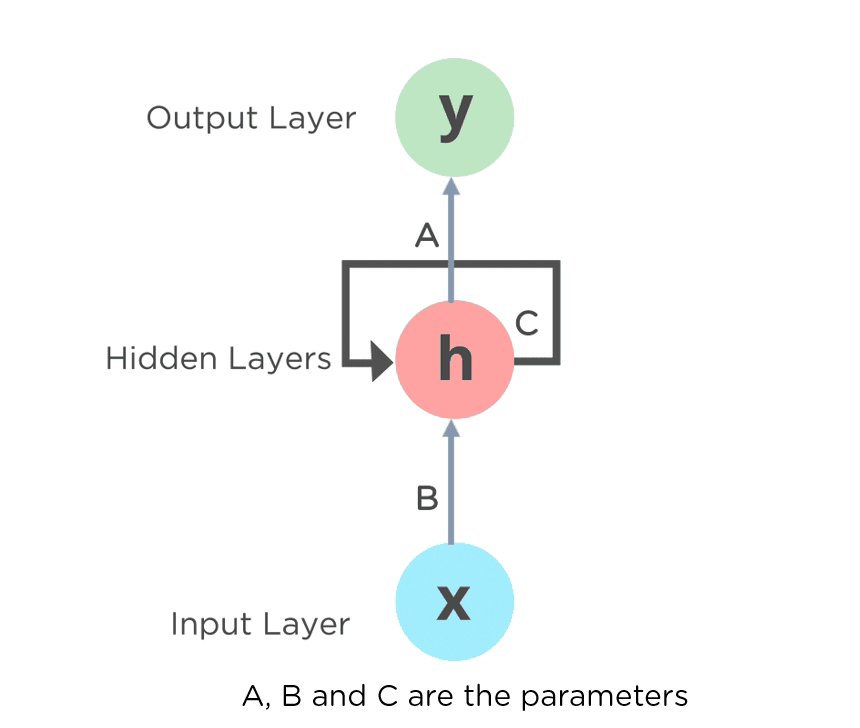

Les quatre types de réseaux neuronaux récurrents couramment utilisés sont :

**One-to-One** : Le type le plus simple de RNN est One-to-One, qui permet une seule entrée et une seule sortie. Il a des tailles d'entrée et de sortie fixes et agit comme un réseau neuronal traditionnel. L'application One-to-One se trouve dans la classification d'images.

**One-to-Many** : One-to-Many est un type de RNN qui donne plusieurs sorties pour une seule entrée. Il prend une taille d'entrée fixe et donne une séquence de sorties de données. Ses applications peuvent être trouvées dans la génération de musique et la légende d'images.

**Many-to-One** : Many-to-One est utilisé lorsqu'une seule sortie est requise à partir de plusieurs unités d'entrée ou d'une séquence d'entre elles. Il prend une séquence d'entrées pour afficher une sortie fixe. L'analyse des sentiments est un exemple courant de ce type de réseau neuronal récurrent.

**Many-to-Many** : Many-to-Many est utilisé pour générer une séquence de données de sortie à partir d'une séquence d'unités d'entrée.

Ce type de RNN est en outre divisé en deux sous-catégories :

1. **Taille d'unité égale** : Dans ce cas, le nombre d'unités d'entrée et de sortie est le même. Une application courante peut être trouvée dans la reconnaissance d'entités nommées (Name-Entity Recognition).
2. **Taille d'unité inégale** : Dans ce cas, les entrées et les sorties ont des nombres d'unités différents. Son application peut être trouvée dans la traduction automatique.


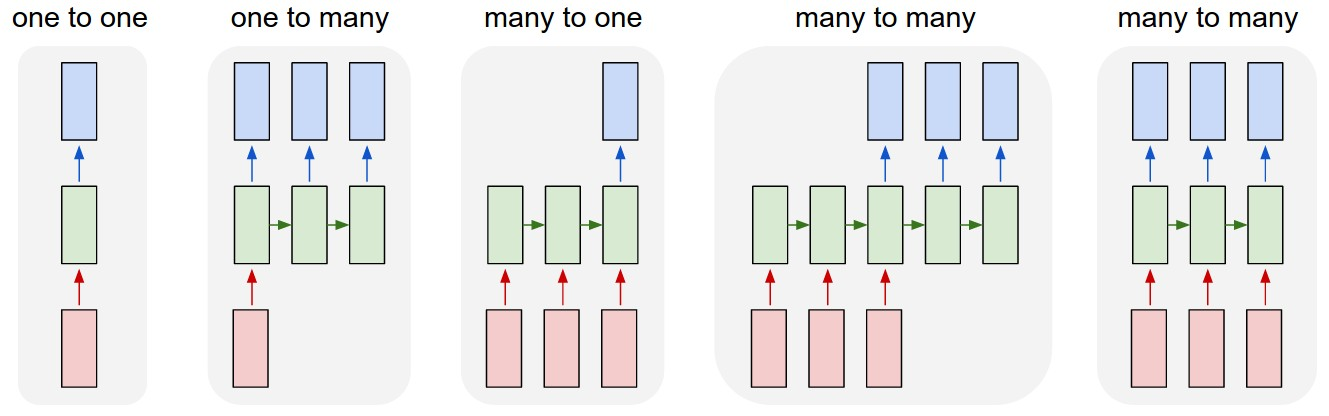

### Vanilla RNN

In [28]:
def plot_loss(history):
    plt.figure(figsize = (15,10))
    plt.plot(history.history['loss'], label='loss')
    plt.legend(loc='best')
    plt.show()

In [29]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=125, input_shape=(n_steps, features)))
model_rnn.add(Dense(units=1))

In [30]:
# Compiling the model
model_rnn.compile(optimizer="RMSprop", loss="mse")

In [31]:
history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

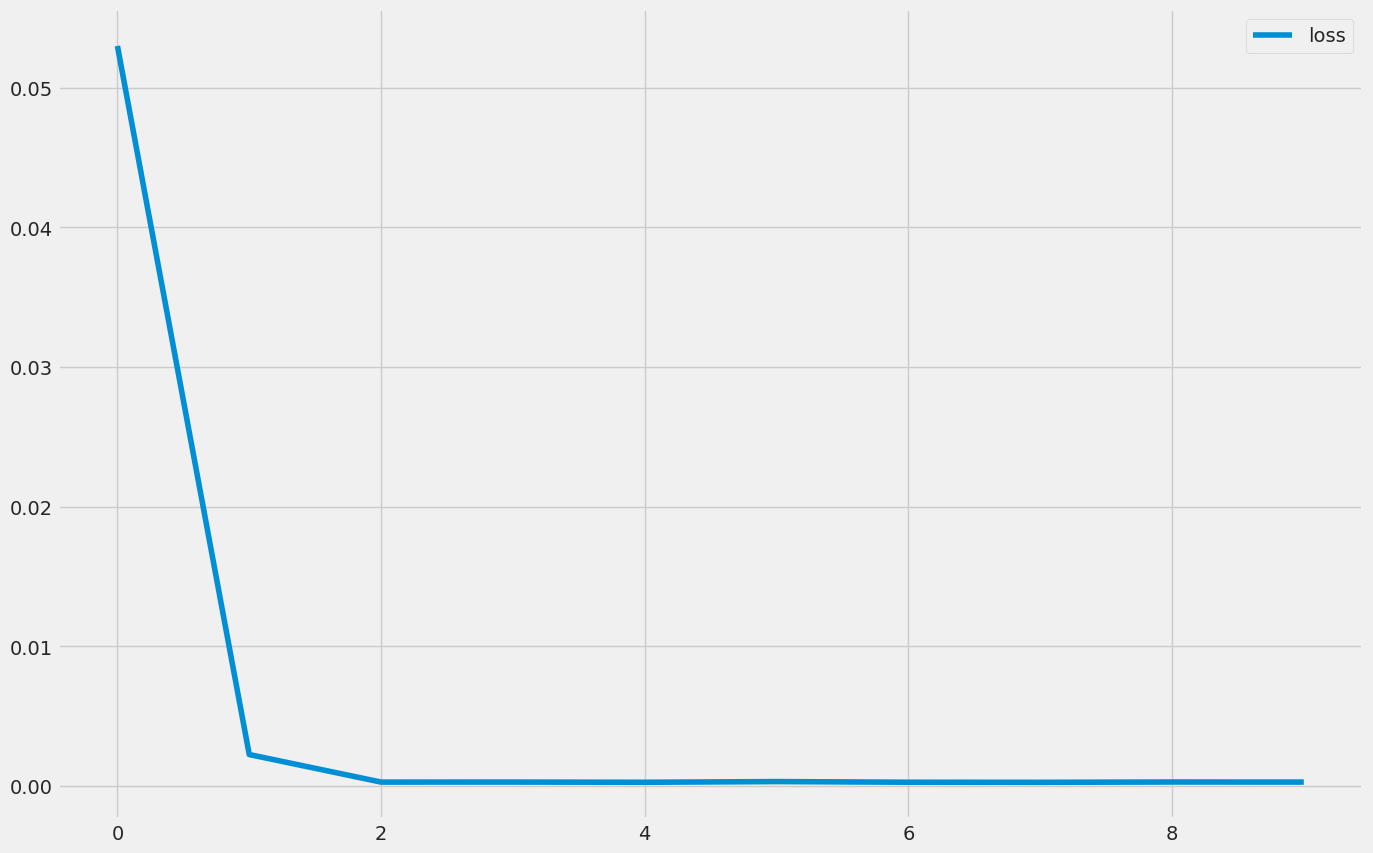

In [32]:
plot_loss(history)

## **Time Series Prediction**

Une manière d'envisager la prédiction de séries temporelles consiste à partir d'un ensemble de tests complet, à extraire la fenêtre passée et à prédire un point dans le futur. Cela peut ne pas fonctionner en pratique si l'on souhaite prédire une fenêtre plus large à l'avenir. Par exemple, dans le problème de prédiction de cours boursiers, nous voulons voir le prix d'une action spécifique sur une période de plusieurs jours et/ou semaines.

Pour ce scénario, nous aurions besoin de générer une séquence, ce qui utilise les valeurs prédites précédemment sur notre fenêtre glissante. Cela peut entraîner une accumulation significative de bruit car les prédictions ne sont pas parfaites.


In [33]:
# Scaling
inputs = sc.transform(test_set.reshape(-1, 1))

In [34]:
# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(-1, n_steps, features)

In [35]:
# Prediction
predicted_stock_price = model_rnn.predict(X_test)
# Inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

28/28 [==============================] - 0s 2ms/step


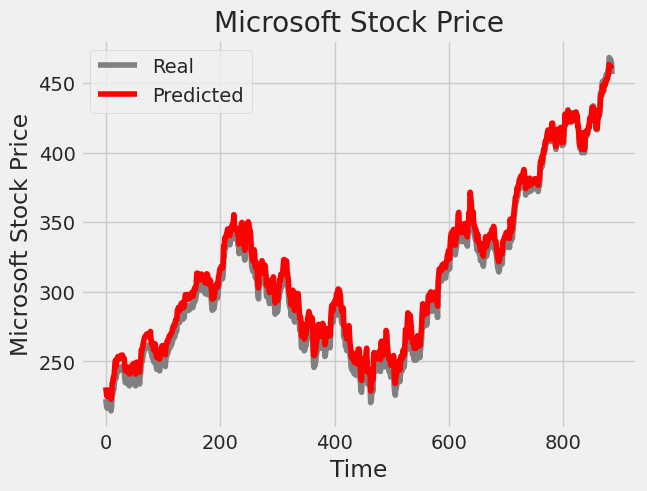

In [36]:
plot_predictions(test_set, predicted_stock_price, "Microsoft Stock Price")

### Sequence Generation

In [52]:
steps_in_future = 50

def sequence_generation(dataset: pd.DataFrame, sc: MinMaxScaler, model:Sequential, steps_future: int):
    high_dataset = dataset.iloc[len(dataset) - len(test_set) - n_steps:]["High"]
    high_dataset = sc.transform(high_dataset.values.reshape(-1, 1))
    inputs = high_dataset[:n_steps]

    for _ in range(steps_future):
        curr_pred = model.predict(inputs[-n_steps:].reshape(-1, n_steps, features), verbose=0)
        inputs = np.append(inputs, curr_pred, axis=0)

    return sc.inverse_transform(inputs[n_steps:])

In [38]:
results = sequence_generation(dataset, sc, model_rnn, steps_in_future)

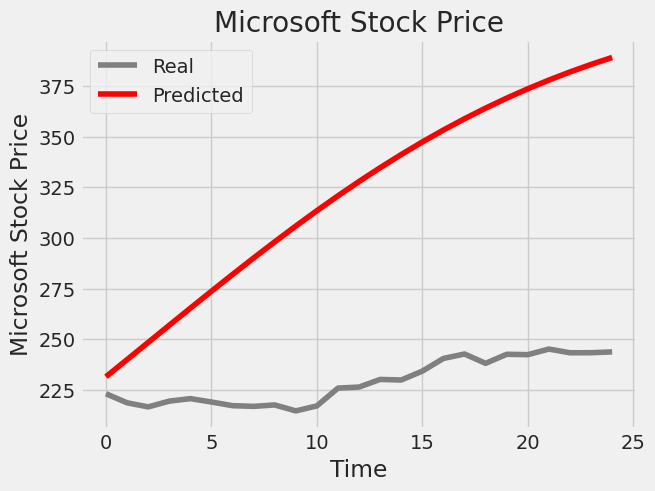

In [40]:
plot_predictions(test_set[:steps_in_future], results, "Microsoft Stock Price")

## **LSTM**

Bien que les RNN soient assez puissants, ils souffrent du problème du "vanishing gradient", ce qui les empêche d'utiliser des informations à long terme. Ils sont efficaces pour stocker la mémoire sur 3 à 4 instances d'itérations passées, mais un nombre plus élevé d'instances ne donne pas de bons résultats, donc on n'utilise pas simplement des RNN réguliers. À la place, nous utilisons une meilleure variante des RNN : les Réseaux de Mémoire à Court et Long Terme (LSTM).

**Qu'est ce que le problème du "vanishing gradient"**

Le problème du "vanishing gradient" est une difficulté rencontrée lors de l'entraînement des réseaux neuronaux artificiels avec des méthodes d'apprentissage basées sur le gradient et la rétropropagation. Dans de telles méthodes, chaque poids du réseau neuronal reçoit une mise à jour proportionnelle à la dérivée partielle de la fonction d'erreur par rapport au poids actuel à chaque itération de l'entraînement. Le problème est que, dans certains cas, le gradient devient très petit, empêchant efficacement le poids de changer de valeur. Dans le pire des cas, cela peut arrêter complètement l'entraînement du réseau neuronal.

Comme exemple de la cause du problème, les fonctions d'activation traditionnelles telles que la fonction tangente hyperbolique ont des gradients dans la plage (0, 1), et la rétropropagation calcule les gradients selon la règle de la chaîne. Cela a pour effet de multiplier n de ces petits nombres pour calculer les gradients des "couches avant" dans un réseau à n couches, ce qui signifie que le gradient diminue exponentiellement avec n.


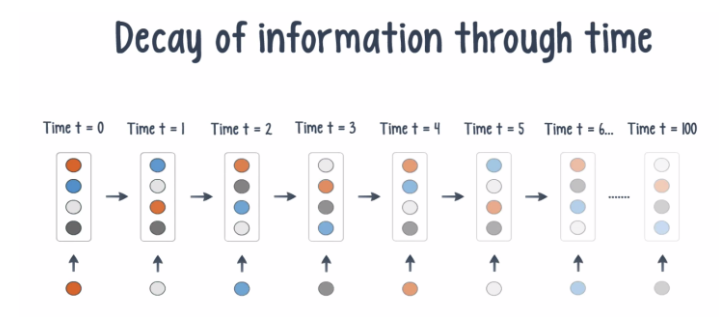

**Fixing the Vanishing/Exploding Gradient with LSTMs**

Les unités (ou blocs) de mémoire à court et long terme (LSTM) sont des éléments constitutifs des couches d'un réseau neuronal récurrent (RNN). Un RNN composé d'unités LSTM est souvent appelé réseau LSTM. Une unité LSTM typique est composée d'une cellule, d'une porte d'entrée, d'une porte de sortie et d'une porte d'oubli. La cellule est responsable de "mémoriser" les valeurs sur des intervalles de temps arbitraires, d'où le terme "mémoire" dans LSTM. Chacune des trois portes peut être considérée comme un neurone artificiel "classique", comme dans un réseau neuronal multicouche (ou feedforward) : elles calculent une activation (à l'aide d'une fonction d'activation) d'une somme pondérée. Intuitivement, elles régulent le flux des valeurs qui traversent les connexions du LSTM, d'où la dénomination "porte". Il y a des connexions entre ces portes et la cellule.

L'expression "long short-term" fait référence au fait que le LSTM est un modèle pour la mémoire à court terme qui peut durer sur une longue période. Un LSTM est bien adapté pour classer, traiter et prédire des séries temporelles en tenant compte des décalages temporels de taille et durée inconnues entre les événements importants. Les LSTM ont été développés pour résoudre les problèmes de gradient qui explose et qui s'évanouit lors de l'entraînement des RNN traditionnels.


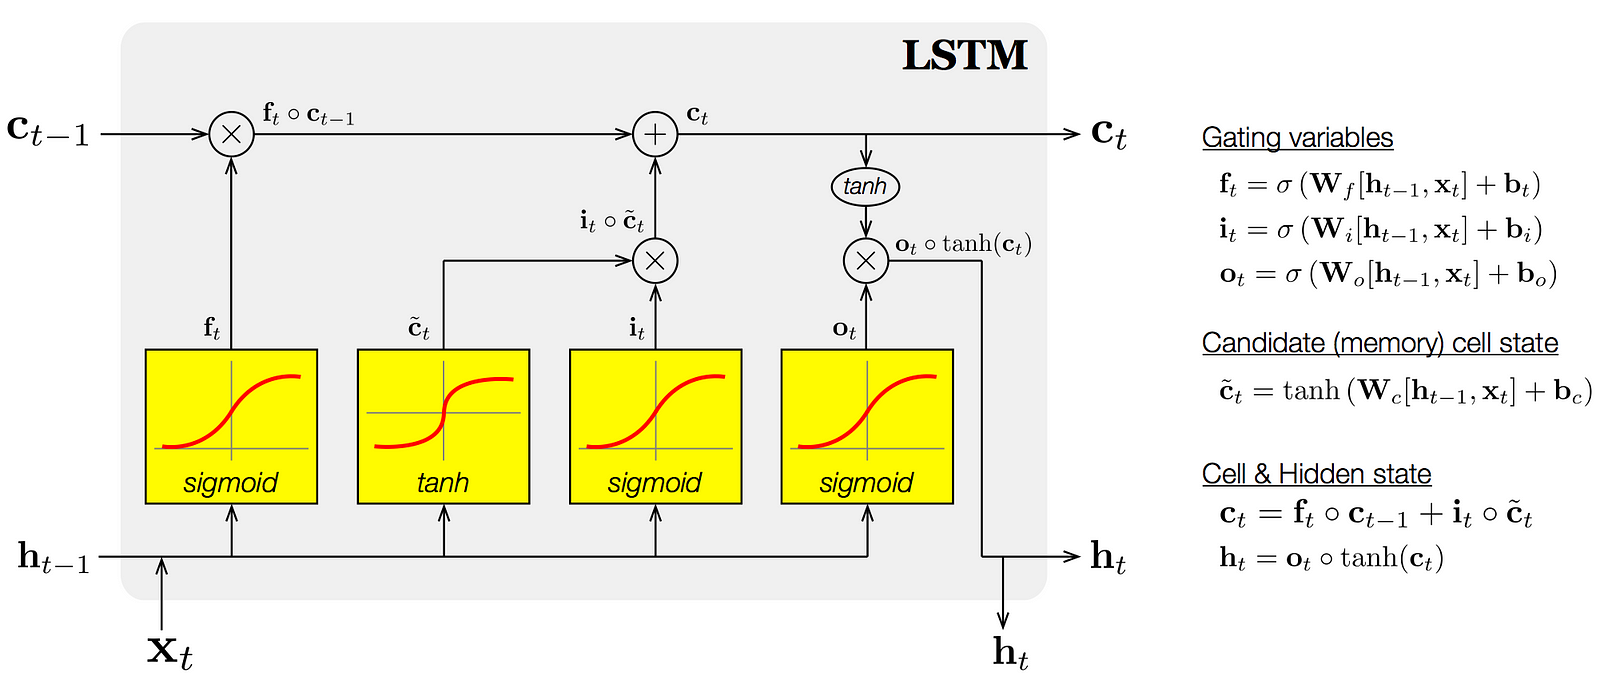

In [41]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))

In [42]:
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

In [43]:
history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

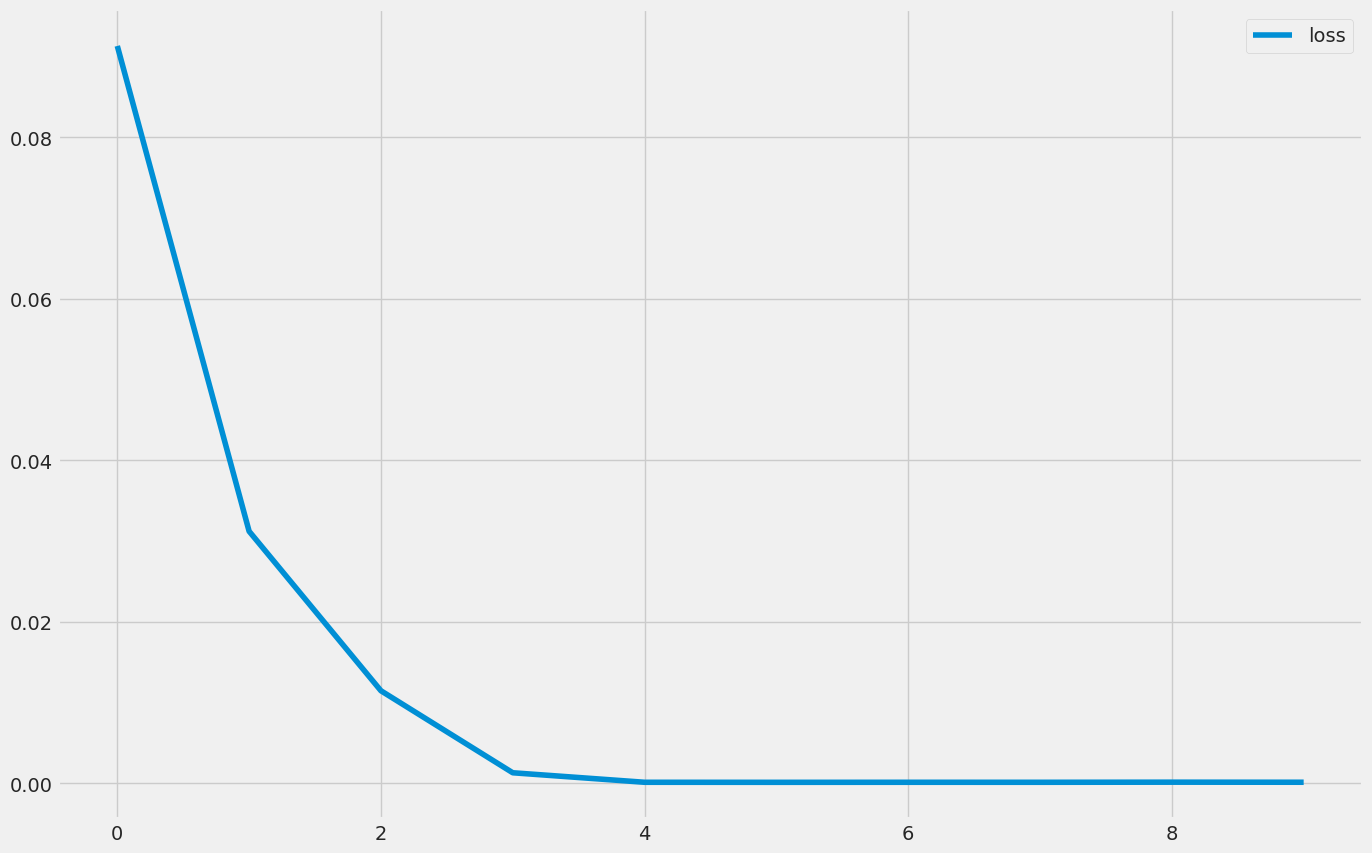

In [44]:
plot_loss(history)

In [45]:
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

28/28 [==============================] - 0s 2ms/step


### Time Series Prediction: LSTM

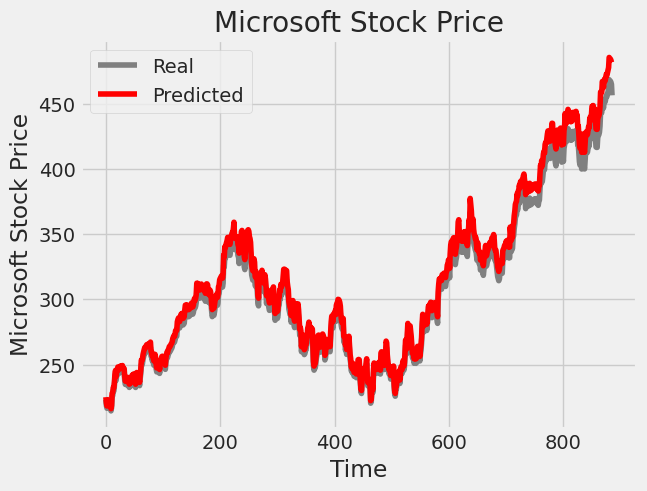

In [47]:
plot_predictions(test_set, predicted_stock_price, "Microsoft Stock Price")

### Sequence Generation: LSTM

In [48]:
results = sequence_generation(dataset, sc, model_lstm, steps_in_future)

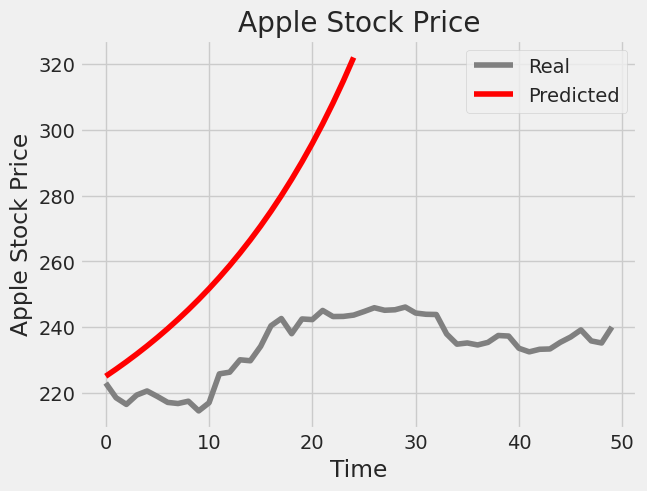

In [53]:
plot_predictions(test_set[:steps_in_future], results, "Apple Stock Price")

## Multivariate Input

Les RNN peuvent être utilisés avec plusieurs dimensions, comme les images. Chaque dimension représente une série temporelle différente. Ici, nous calculons des indicateurs techniques qui sont corrélés avec le prix de nos actions pour prédire les **gains**.


In [54]:
mv_features = 6

In [55]:
multi_variate_df = dataset.copy()

multi_variate_df['RSI'] = ta.rsi(multi_variate_df.Close, length=15)
multi_variate_df['EMAF'] = ta.ema(multi_variate_df.Close, length=20)
multi_variate_df['EMAM'] = ta.ema(multi_variate_df.Close, length=100)
multi_variate_df['EMAS'] = ta.ema(multi_variate_df.Close, length=150)


### Creating Labels

In [56]:
multi_variate_df['Target'] = multi_variate_df['Adj Close'] - dataset.Open
multi_variate_df['Target'] = multi_variate_df['Target'].shift(-1)
multi_variate_df.dropna(inplace=True)
multi_variate_df.drop(['Volume', 'Close'], axis=1, inplace=True)

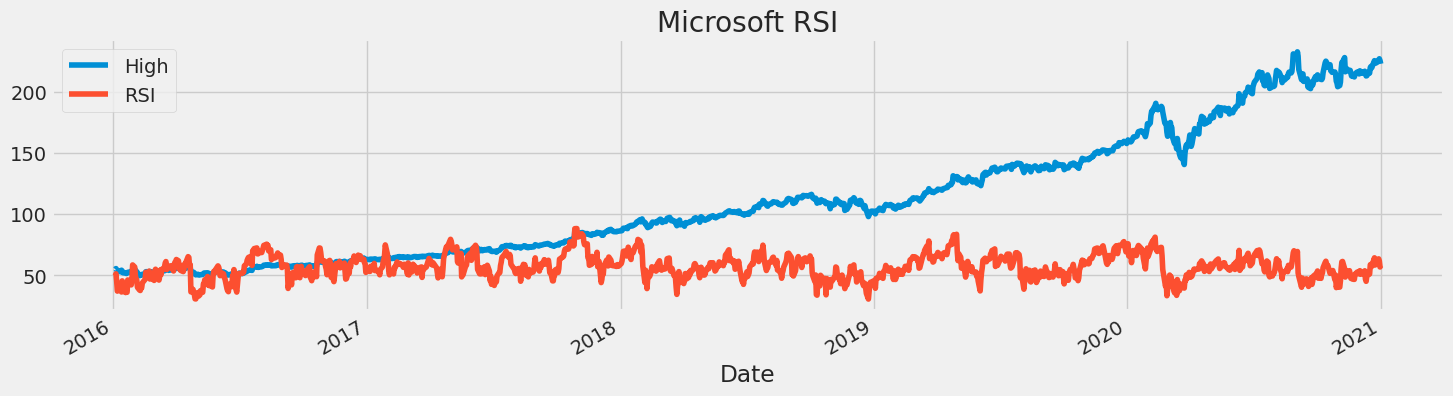

In [58]:
multi_variate_df.loc[f"{tstart}":f"{tend}", ['High', 'RSI']].plot(figsize=(16, 4), legend=True)
plt.title("Microsoft RSI")
plt.show()

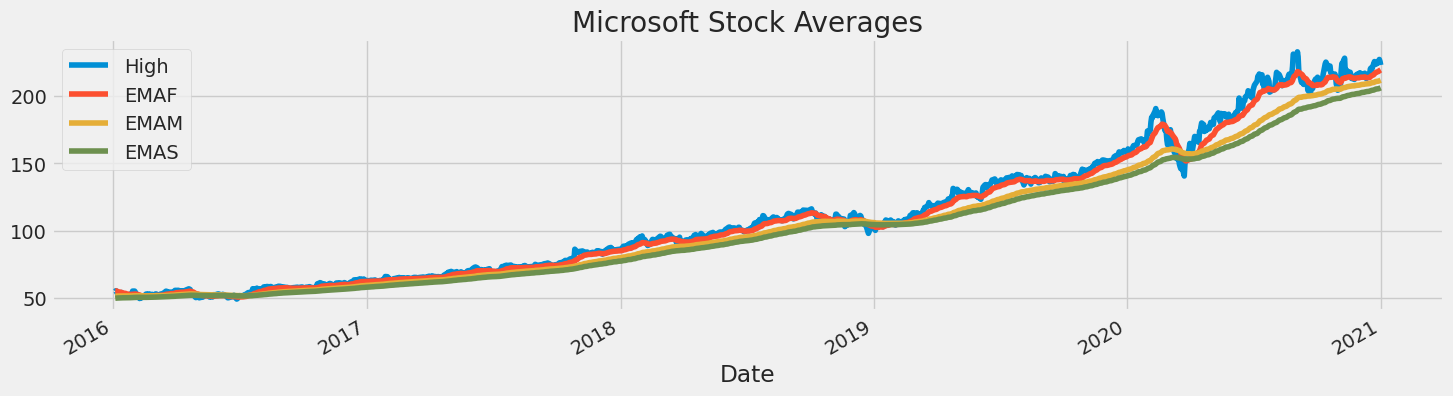

In [59]:
multi_variate_df.loc[f"{tstart}":f"{tend}", ['High', 'EMAF', 'EMAM', 'EMAS']].plot(figsize=(16, 4), legend=True)
plt.title("Microsoft Stock Averages")
plt.show()

In [60]:
feat_columns = ['Open', 'High', 'RSI', 'EMAF', 'EMAM', 'EMAS']
label_col = ['Target']

### Splitting train and test data

In [61]:
mv_training_set, mv_test_set = train_test_split(multi_variate_df, tstart, tend, feat_columns + label_col)

In [62]:
X_train = mv_training_set[:, :-1]
y_train = mv_training_set[:, -1]

X_test = mv_test_set[:, :-1]
y_test = mv_test_set[:, -1]

### Scaling Data

In [63]:
mv_sc = MinMaxScaler(feature_range=(0, 1))
X_train = mv_sc.fit_transform(X_train).reshape(-1, 1, mv_features)
X_test = mv_sc.transform(X_test).reshape(-1, 1, mv_features)

### Model

In [64]:
model_mv = Sequential()
model_mv.add(LSTM(units=125, input_shape=(1, mv_features)))
model_mv.add(Dense(units=1))
# Compiling the model
model_mv.compile(optimizer="RMSprop", loss="mse")

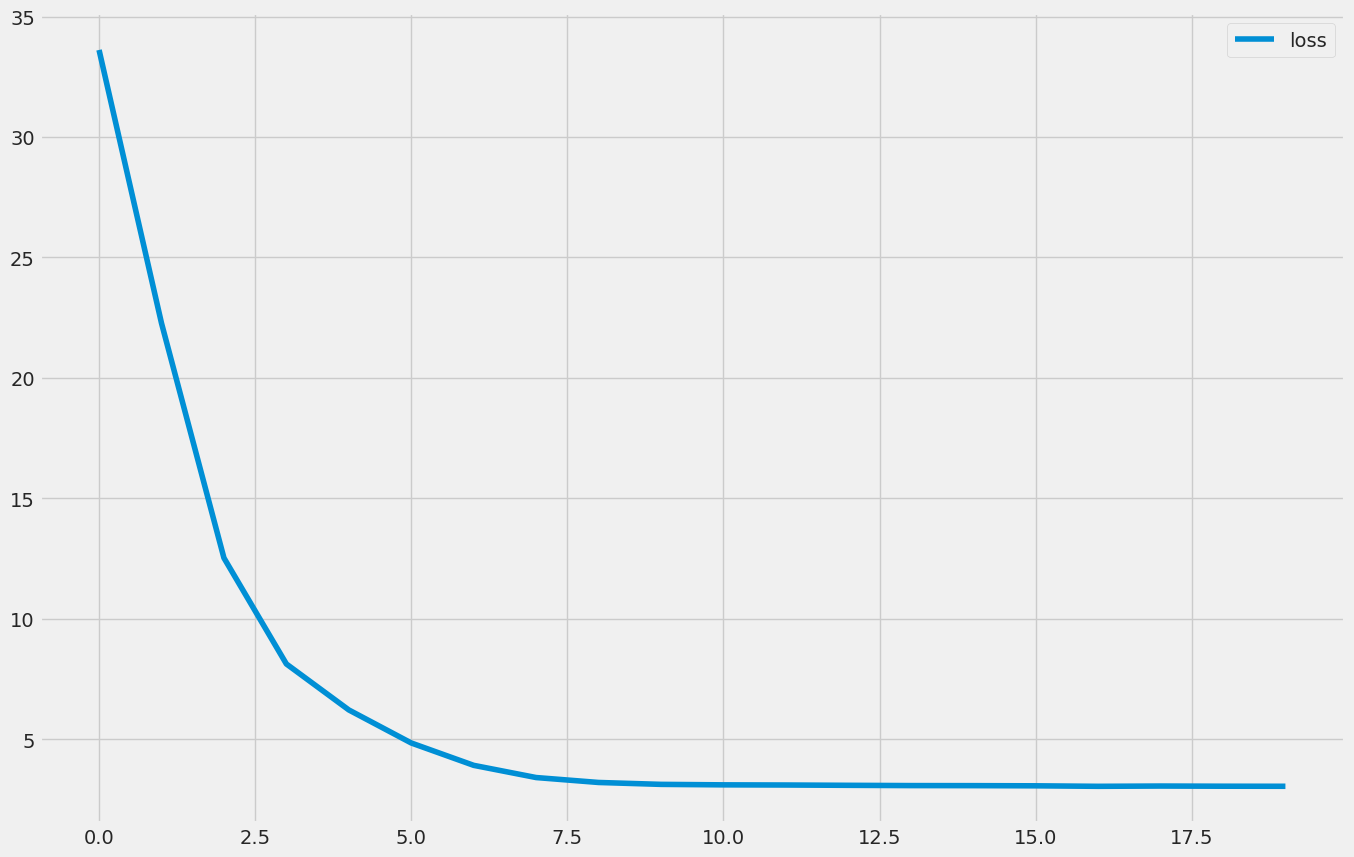

In [65]:
history = model_mv.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
plot_loss(history)

### Results

28/28 [==============================] - 1s 3ms/step


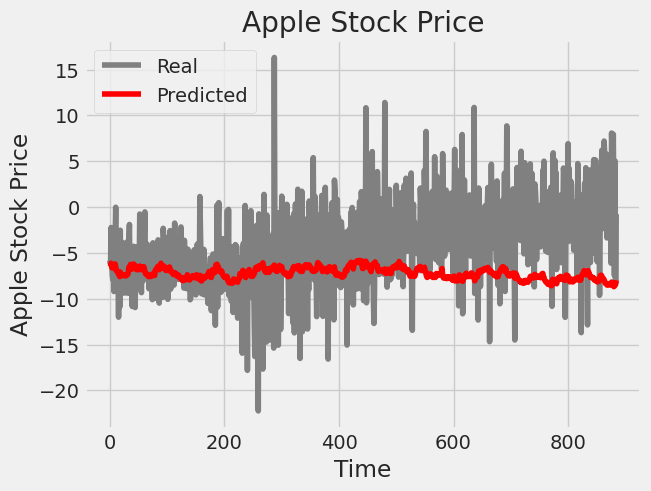

In [66]:
predictions = model_mv.predict(X_test)
plot_predictions(y_test, predictions, "Apple Stock Price")

## **Conclusion**

Dans ce projet, nous avons exploré l'utilisation des Réseaux Neuronaux Récurrents (RNN) et des modèles à Mémoire à Court et Long Terme (LSTM) pour la prédiction des prix des actions. Nous avons suivi une approche étape par étape pour comprendre les concepts, prétraiter les données, construire les modèles et évaluer leurs performances.

Tout au long du projet, nous avons acquis des insights sur les complexités et les défis liés à la prédiction des prix des actions. Nous avons appris comment prétraiter les données de séries temporelles, construire des modèles de réseaux neuronaux et évaluer leur performance. Ce projet sert de point de départ pour une exploration et une expérimentation ultérieures dans le domaine de la prédiction des prix des actions en utilisant les RNN et les LSTMs.
